In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pathlib
from Tfidf.Tf_idf_Service import TfidfService
import pickle
from pathlib import Path
from collections import defaultdict
import json

# Set the current working directory
cwd = pathlib.Path().cwd()

# Define the paths to the TF-IDF matrices
lifestyle_tfidf_matrix_path = cwd / 'files' / 'lifestyle' / 'tfidf_matrix.pkl'

# Initialize the TfidfService and load the TF-IDF matrix for clinical trial documents
tfidfservice = TfidfService()
tfidf_matrix = tfidfservice.load_tfidf_matrix(lifestyle_tfidf_matrix_path)

# Normalize the TF-IDF matrix
scaler = StandardScaler(with_mean=False)
tfidf_matrix_normalized = scaler.fit_transform(tfidf_matrix)

# Perform KMeans clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_

# Save the KMeans model and the TF-IDF vectorizer
kmeans_model_path = cwd / 'files' / 'lifestyle' / "kmeans_model.pkl"
with open(kmeans_model_path, 'wb') as f:
    pickle.dump(kmeans, f)

print("KMeans model saved.")

# Create an inverted index for clusters
inverted_index = defaultdict(list)
for i, label in enumerate(labels):
    inverted_index[int(label)].append(i)  # Convert label to int

# Save the inverted index as a JSON file
inverted_index_path = cwd / 'files' / 'lifestyle' / "inverted_index_kmeans.json"
with open(inverted_index_path, 'w') as f:
    json.dump(inverted_index, f)

print("Inverted index saved as JSON.")


c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans model saved.
Inverted index saved as JSON.


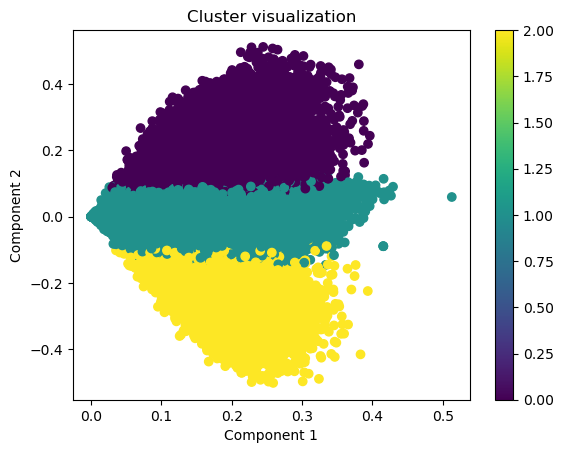

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import pickle
import pathlib

# Set the current working directory
cwd = pathlib.Path().cwd()

# Define the path to the saved KMeans model
kmeans_model_path = cwd / 'files' / 'lifestyle' / "kmeans_model.pkl"

# Load the KMeans model
with open(kmeans_model_path, 'rb') as f:
    kmeans = pickle.load(f)

# Perform dimensionality reduction for visualization using TruncatedSVD
svd = TruncatedSVD(n_components=2)
reduced_data = svd.fit_transform(tfidf_matrix)  # Transform TF-IDF matrix to 2D

# Visual representation using TruncatedSVD
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_)
plt.title('Cluster visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()  # Show color scale
plt.show()
